In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('//Users//omniaelmenshawy//Desktop//machinfy///housing.csv', sep=',', encoding='utf-8')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male


### Data Analysis:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [4]:
df = df.drop_duplicates()

In [5]:
print(df.shape)

(20640, 11)


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64


In [8]:
#sample of the missing values:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
5,-122.25,37.85,NaN,919,213.0,NaN,193,4.0368,269700,NEAR BAY,female
6,-122.25,37.84,NaN,2535,NaN,NaN,514,3.6591,299200,NEAR BAY,male
7,-122.25,37.84,NaN,3104,NaN,NaN,NaN,3.1200,241400,NEAR BAY,female
8,-122.26,37.84,42.0,2555,NaN,NaN,NaN,2.0804,226700,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20627,-121.32,39.13,NaN,358,NaN,169.0,NaN,3.0000,162500,INLAND,female
20628,-121.48,39.10,NaN,2043,NaN,1018.0,NaN,2.5952,92400,INLAND,male
20629,-121.39,39.12,NaN,10035,NaN,6912.0,NaN,2.0943,108300,INLAND,female
20630,-121.32,39.29,NaN,2640,NaN,1257.0,NaN,3.5673,112000,INLAND,male


Total Missing:  13276


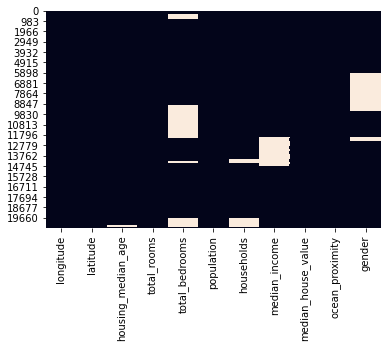

In [9]:
sns.heatmap(df.isnull(), cbar=False)
print("Total Missing: ", df.isna().sum().values.sum())

### Data Visualization Before:

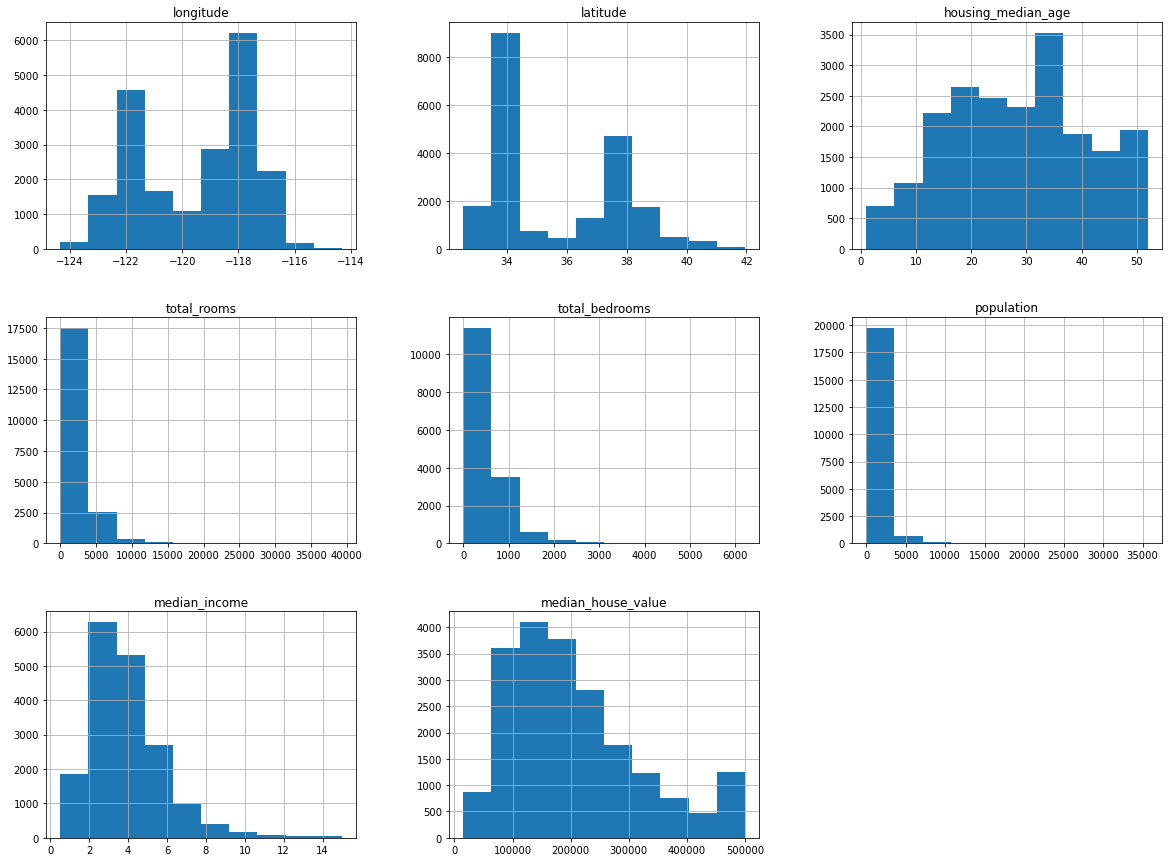

In [10]:
df.hist(figsize=(20,15))
plt.show()

#### Most houses have bedrooms between 0 to 1000.
#### Houses with more than 1000 room are rare.

Text(0.5, 0, 'Total bedrooms')

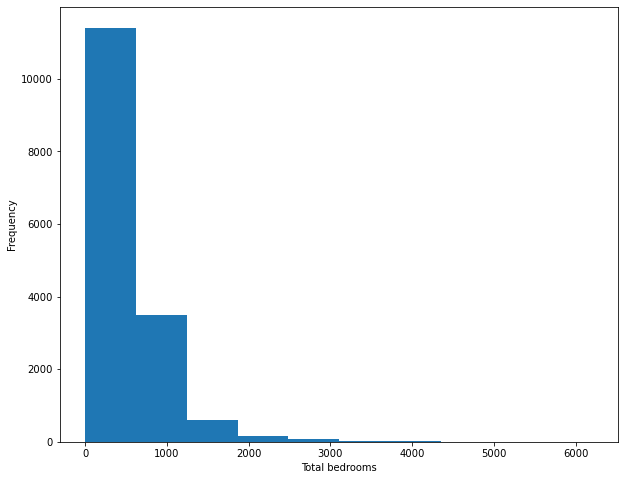

In [11]:
plt.figure(figsize=(10,8))
df['total_bedrooms'].plot(kind='hist')
plt.xlabel('Total bedrooms')

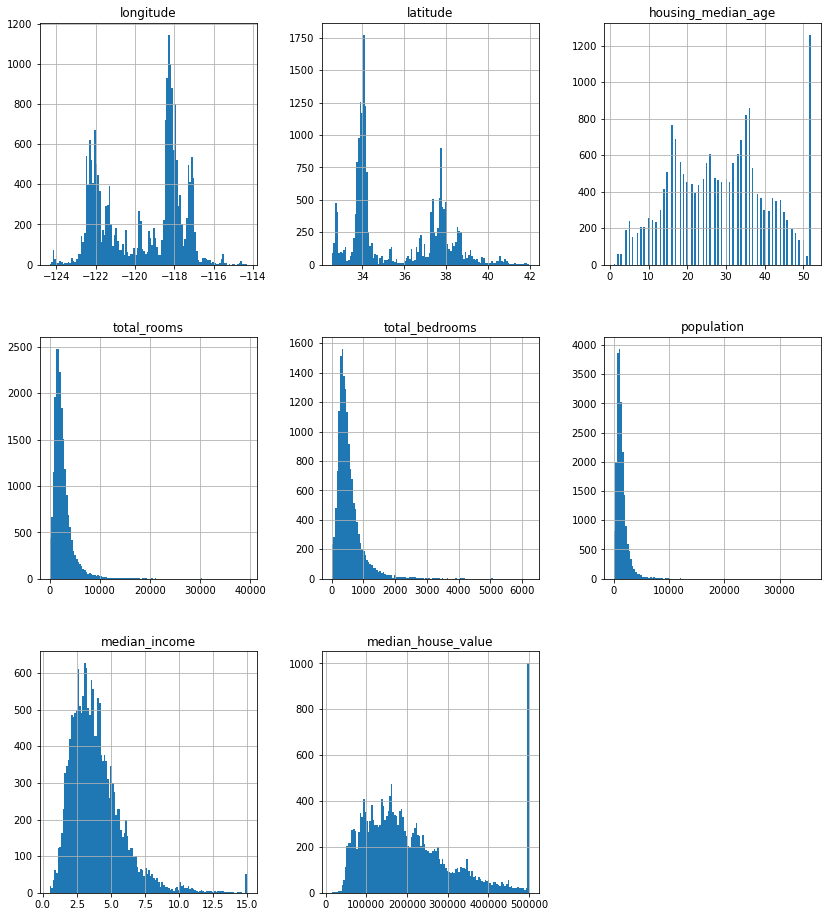

In [12]:
df.hist(bins=120, figsize = (14,16))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

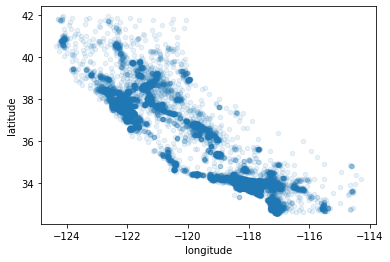

In [13]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.1)

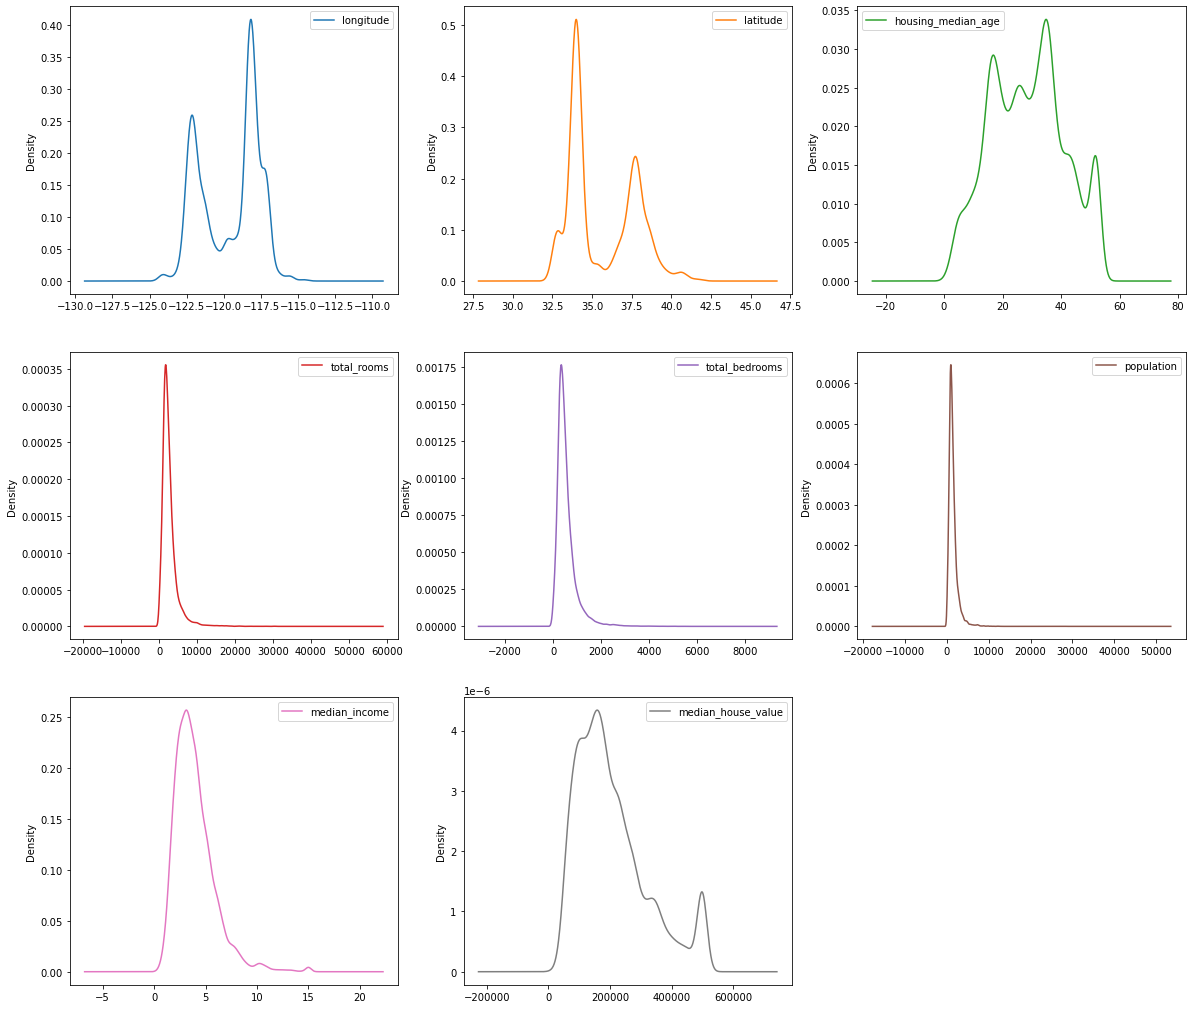

In [14]:
df.plot(kind='density', subplots = True, figsize = (20,18), layout=(3,3), sharex = False)
plt.show()

#### Outliers:

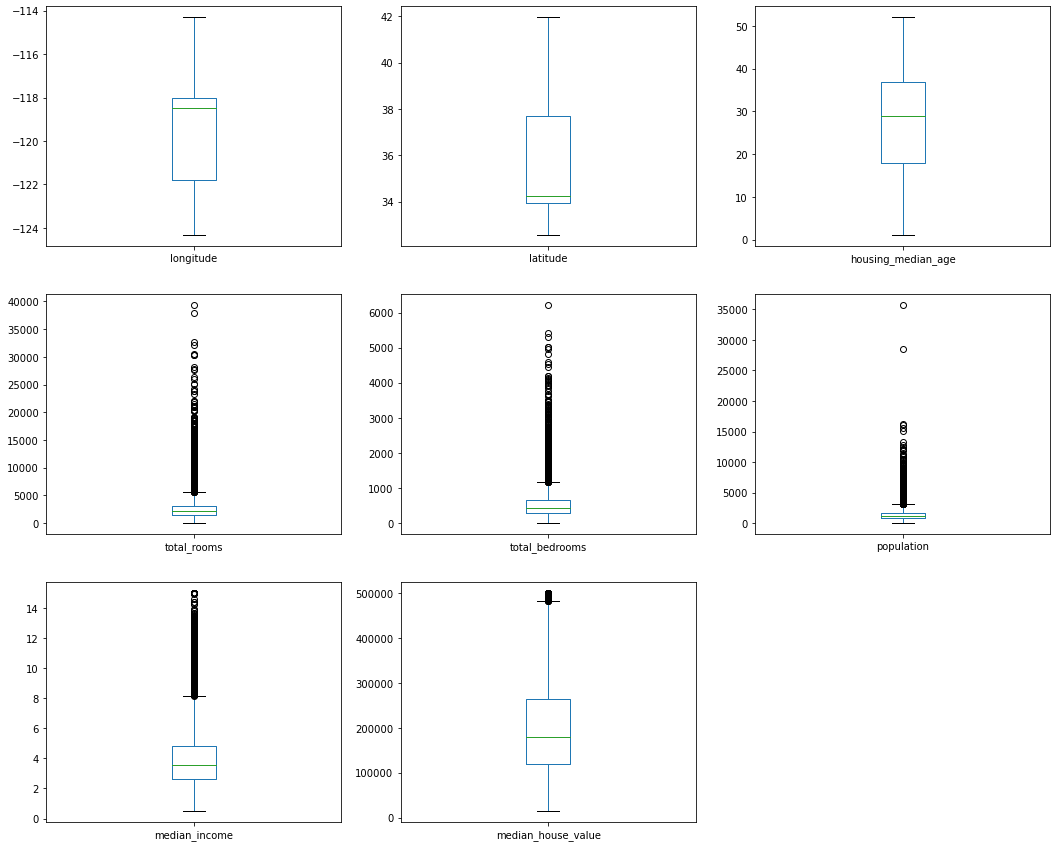

In [15]:
df.plot(kind='box', subplots = True, figsize=(18,15),layout=(3,3), sharex = False, sharey = False)
plt.show()

/Users/omniaelmenshawy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing_median_age'>

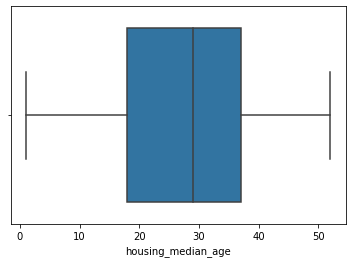

In [16]:
sns.boxplot(df['housing_median_age'])

/Users/omniaelmenshawy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_rooms'>

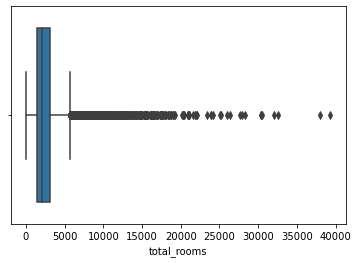

In [17]:
sns.boxplot(df['total_rooms'])

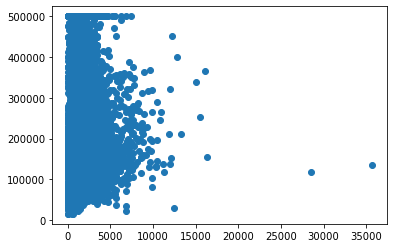

In [18]:
plt.scatter(df['population'], df['median_house_value'])

/Users/omniaelmenshawy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population'>

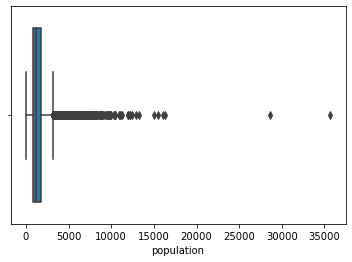

In [19]:
sns.boxplot(df['population'])

/Users/omniaelmenshawy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_income'>

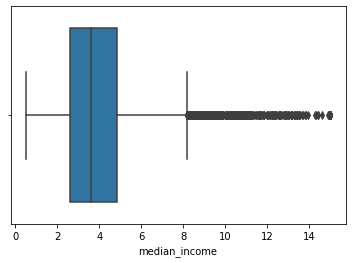

In [20]:
sns.boxplot(df['median_income'])

In [21]:
print("The Outliers are: ", df[ df['population']>4000] ['population'].count())
clean = df[(df['population']>4000)]
clean.shape

The Outliers are:  582


(582, 11)

In [22]:
clean = df[(df['total_rooms'] <5000) & df['population'] < 12000]

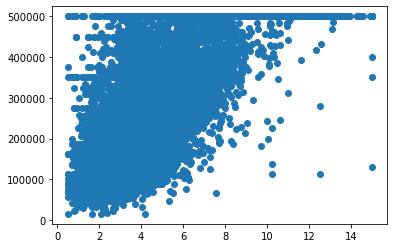

In [23]:
plt.scatter(df['median_income'], df['median_house_value'])

### Calculating the outliers:

- The IQR describes the middle 50% of values when ordered from lowest to highest.
- To find the interquartile range (IQR), 
​ first find the median (middle value) of the lower and upper half of the data.
- These values are quartile 1 (Q1) and quartile 3 (Q3). 
- The IQR is the difference between Q3 and Q1.



In [24]:
Q1 = df[['median_house_value', 'median_income']].quantile(0.25)
Q3 = df[['median_house_value', 'median_income']].quantile(0.75)
IQR = Q3 - Q1
Lower = ((Q1 - 1.5 * IQR))
Upper = ((Q3 - 1.5 * IQR))
print(Lower)
print(Upper)


median_house_value   -98087.5000
median_income            -0.7491
dtype: float64
median_house_value    47037.5000
median_income             1.4827
dtype: float64


In [25]:
def find_outliers(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    Lower = q1 - 1.5*iqr
    Upper = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < Lower) | (x > Upper)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [26]:
median_house_value_indices, median_house_value_value = find_outliers(df['median_house_value'])
print("Outliers for the median house value: ")
print(np.sort(median_house_value_value))

print("Outliers for the median income: ")
median_income_indices, median_income_values = find_outliers(df['median_income'])
print(np.sort(median_income_values))

Outliers for the median house value: 
[482700 482900 483100 ... 500001 500001 500001]
Outliers for the median income: 
[ 8.1782  8.1839  8.1871  8.1872  8.1888  8.19    8.1926  8.1988  8.2004
  8.203   8.2037  8.2049  8.2064  8.2069  8.2159  8.2266  8.2269  8.2335
  8.2364  8.2375  8.2405  8.2435  8.2436  8.248   8.2531  8.2598  8.2653
  8.2664  8.2673  8.2737  8.2782  8.2787  8.2816  8.2827  8.2831  8.284
  8.2883  8.289   8.2934  8.2953  8.2954  8.2961  8.3014  8.3065  8.317
  8.3188  8.3209  8.3252  8.3275  8.3337  8.3474  8.3605  8.3608  8.3609
  8.3617  8.3634  8.3637  8.3646  8.3678  8.3695  8.3792  8.3818  8.3837
  8.3839  8.3841  8.3912  8.3924  8.3931  8.3935  8.3956  8.3996  8.401
  8.4045  8.4112  8.4196  8.4262  8.4284  8.4331  8.4352  8.4375  8.4389
  8.4438  8.4443  8.4471  8.4476  8.4546  8.4614  8.468   8.4693  8.4704
  8.4709  8.4721  8.4802  8.4882  8.4888  8.4889  8.492   8.4952  8.5136
  8.5153  8.5184  8.5294  8.5325  8.5326  8.5403  8.5407  8.5421  8.5425
  8.5491

In [27]:
df[df['median_house_value']== 15.0001]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender


### Dropping unnecessary data:

In [28]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

In [29]:
d_in = df[['median_house_value' , 'median_income']]

In [30]:
d_in.shape

(20640, 2)

In [31]:
d_out = d_in[~((d_in<(Q1 - 1.5 *IQR)) | (d_in > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [32]:
d_out.shape

(19404, 2)

In [33]:
#from sklearn.preprocessing import LabelEncoder

In [34]:
#ocean_E = LabelEncoder()

In [35]:
#df['ocean_proximity']=ocean_E.fit_transform(df['ocean_proximity'])

In [36]:
#cean_E.classes_

#### Handelling the missing data:

In [37]:
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value' ]]

In [38]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


In [39]:
df['total_bedrooms'].median()

435.0

In [40]:
#df.loc[df['total_bedrooms'].isna(),'total_bedrooms']=df['total_bedrooms'].mean()

In [41]:
df['total_bedrooms'].fillna(3148.000000, inplace=True)

/Users/omniaelmenshawy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [42]:
df['median_income'].median()

3.5871

In [43]:
df['median_income'].fillna(3.5871, inplace=True)


In [44]:
df['population'].median()

1166.0

In [45]:
df['population'].fillna(1166.0, inplace=True)


In [46]:
df['housing_median_age'].median()

29.0

In [47]:
#df['population'].fillna(1723.000000, inplace=True)

In [83]:

df.loc[df['housing_median_age'].isna(),'housing_median_age']=df['housing_median_age'].mean()

In [49]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100


In [50]:
df = df[df.isnull().sum(axis=1) < 3]

In [51]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300
4,-122.25,37.85,NaN,1627,280.0,1166.0,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700


# Households problem:

In [52]:
df.pivot_table(index = 'households', aggfunc='size')

households
1          1
10         4
100        8
1000       6
1001       4
        ... 
994        3
995        2
997        8
998        3
no      3080
Length: 1703, dtype: int64

In [53]:
df['households'].replace('no' , "NaN",inplace=True)

In [54]:
df.pivot_table(index = 'households', aggfunc='size')

households
1          1
10         4
100        8
1000       6
1001       4
        ... 
994        3
995        2
997        8
998        3
NaN     3080
Length: 1703, dtype: int64

In [55]:
df["households"]=df['households'].astype(float)

In [56]:
df["households"].mean(), df['households'].min(), df["households"].max(), df["households"].median()

(500.7971701015072, 1.0, 5358.0, 409.0)

In [57]:
df["households"].mode(), df["households"].std()

(0    282.0
 dtype: float64,
 378.2918327613783)

In [58]:
df['households'].fillna(498.0, inplace=True)

In [59]:
df.replace('no' , "NaN",inplace=True)

/Users/omniaelmenshawy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='households', ylabel='Density'>

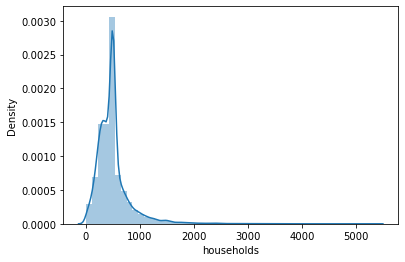

In [60]:
sns.distplot(df["households"])

In [61]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age    258
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


Total Missing:  258


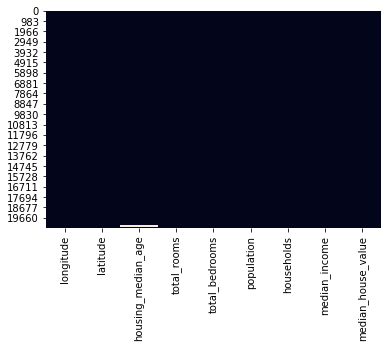

In [62]:
sns.heatmap(df.isnull(), cbar=False)
print("Total Missing: ", df.isna().sum().values.sum())

### Correlation:

- the median house value is positivily correlated with the median income and has a great impact
- while it is negatively correlated with the:
 - latitude: the value decreases when we go north
 - longitude: the value also decreases when we go west
 - population: the value decreases when the total number of people living in the block increases

In [63]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.107447,0.044568,0.045122,0.100214,0.053059,-0.007065,-0.045967
latitude,-0.924664,1.000000,0.009773,-0.036100,-0.030512,-0.109017,-0.056931,-0.084142,-0.144160
housing_median_age,-0.107447,0.009773,1.000000,-0.360441,-0.213496,-0.294025,-0.292852,-0.098517,0.107378
total_rooms,0.044568,-0.036100,-0.360441,1.000000,0.273445,0.855955,0.794156,0.182119,0.134153
total_bedrooms,0.045122,-0.030512,-0.213496,0.273445,1.000000,0.226972,0.291622,0.070664,0.046920
population,0.100214,-0.109017,-0.294025,0.855955,0.226972,1.000000,0.782424,-0.002112,-0.024576
households,0.053059,-0.056931,-0.292852,0.794156,0.291622,0.782424,1.000000,-0.000936,0.058559
median_income,-0.007065,-0.084142,-0.098517,0.182119,0.070664,-0.002112,-0.000936,1.000000,0.661196
median_house_value,-0.045967,-0.144160,0.107378,0.134153,0.046920,-0.024576,0.058559,0.661196,1.000000


In [64]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.661196
total_rooms           0.134153
housing_median_age    0.107378
households            0.058559
total_bedrooms        0.046920
population           -0.024576
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

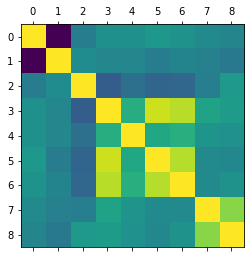

In [65]:
plt.matshow(df.corr())
plt.show()

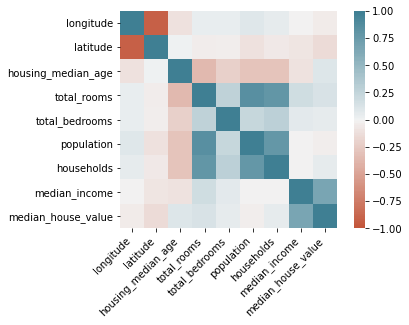

In [66]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Data Visualization after Handelling it:

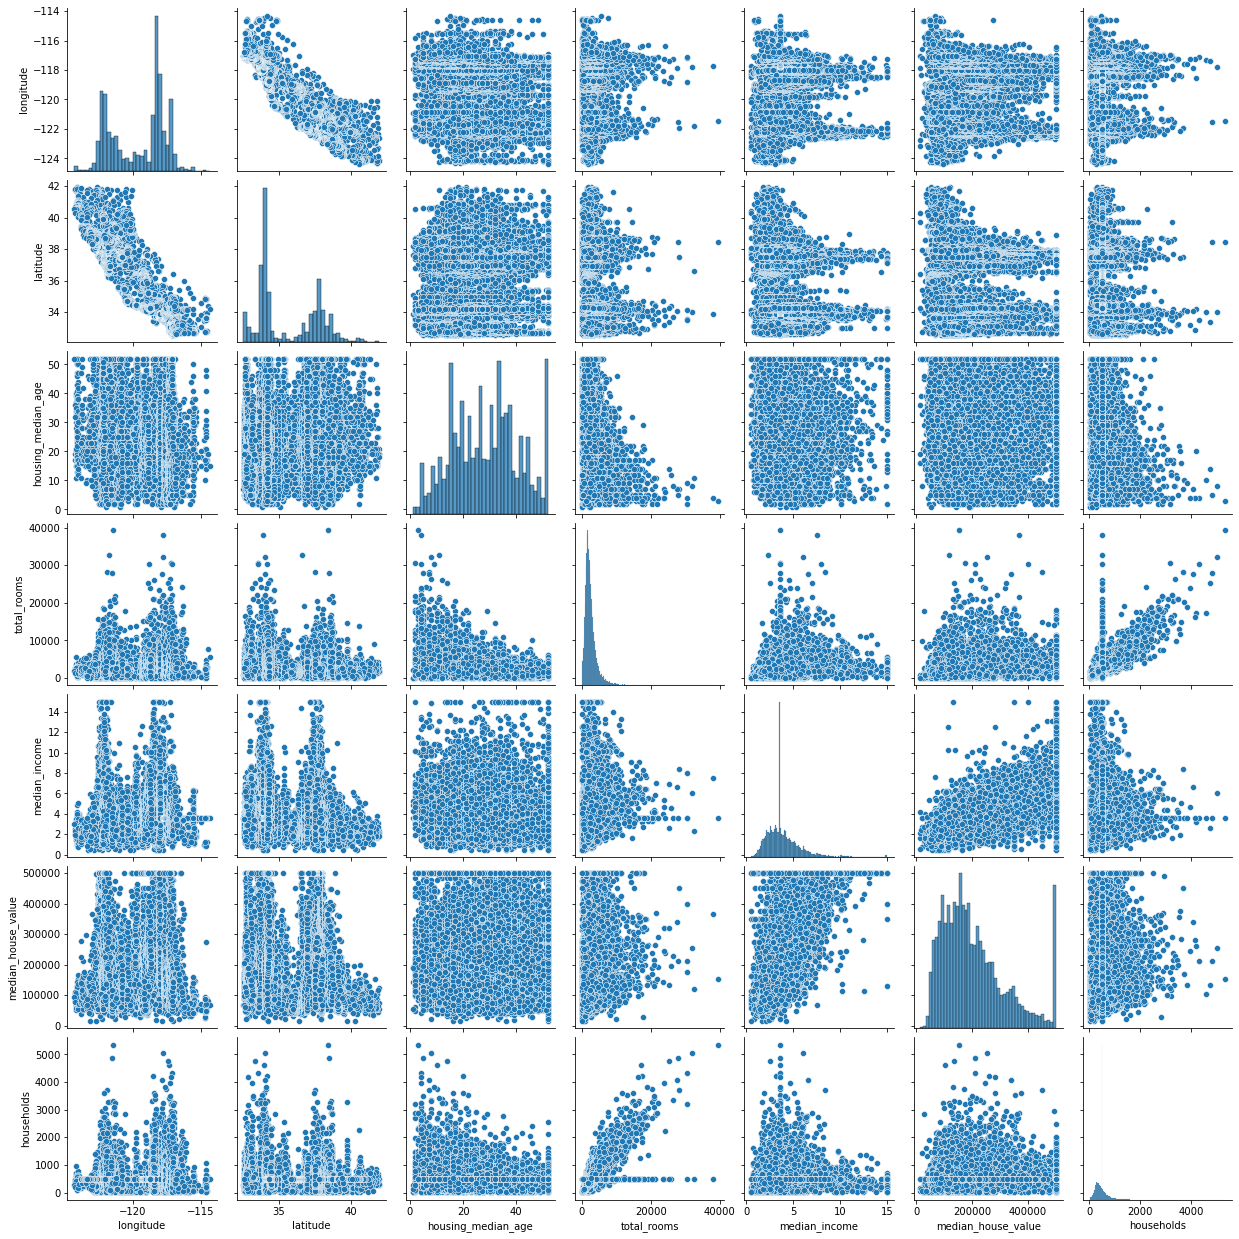

In [67]:
column_study = ["longitude", "latitude", "housing_median_age", "total_rooms", "median_income", "median_house_value", "households"]
sns.pairplot(df[column_study], height = 2.5);
plt.show()

In [68]:
import folium
from folium.plugins import HeatMap, MarkerCluster
from folium import Choropleth, Circle, Marker


cal_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(cal_map)
cal_map

#### shape of price distribution by the latitude and longitude:
- high-density areas are:
 * the Bay Area
 * around Los Angeles and San Diego
 * plus a long line of fairly high density in the Central Valley, around Sacramento and Fresno.

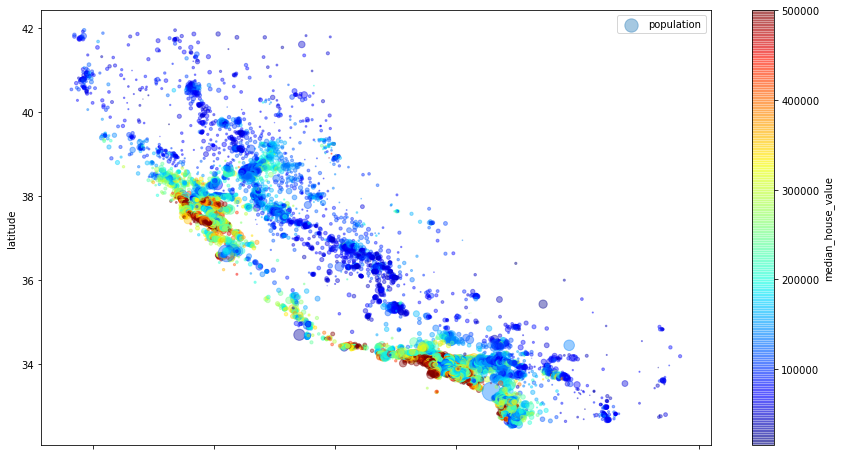

In [69]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df["population"]/100, label="population", figsize=(15,8),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [70]:
#nearbay_df = df.loc[df['ocean_proximity'] == 'NEAR BAY']
#nearbay_df.head()

In [71]:
#latitude = 36.7783
#longitude = -119.4179
#island_df = df.loc[df['ocean_proximity'] == 'ISLAND']

#m = folium.Map(location = [latitude, longitude], tiles='cartodbpositron', zoom_start=4)
#for idx, row in island_df.iterrows():
#    Marker([row['latitude'], row['longitude']]).add_to(m)
#m

#### Maximum Values around the 500001 Dollar and they are all near the ocean

In [72]:
print("House statistics:\n")
print(df['median_house_value'].describe())

House statistics:

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


### Linear Regression and Training:

In [84]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [86]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [87]:
x = df.drop(['median_house_value','ocean_proximity', 'gender'],axis = 1).values
y = clean["median_house_value"].values

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 40)

In [89]:


x_train.shape

(15480, 8)

In [90]:
x_test.shape

(5160, 8)

In [91]:
y_train.shape

(15480,)

In [92]:
y_test.shape

(5160,)

In [93]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [94]:
y_predict = lr.predict(x_test)

In [95]:
lr.score(x_train, y_train)

0.594134795351382

In [96]:
lr.score(x_test,y_test)

0.5886426553283662

In [97]:
100*x_test.shape[0]/x_train.shape[0]

33.333333333333336

### Model Visualization:
Errors are close to normal distribution and also the mean is pretty close to zero

In [ ]:
test_residuals = y_test - y_predict
test_residuals


In [ ]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual Plot');

In [ ]:
sns.displot(test_residuals,bins=30,kde=True);

In [ ]:
predictions = lr.predict(x_test)

In [ ]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')